In [122]:
import numpy as np
import pandas as pd
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_table('Measurements.tbl')
df.columns

Index(['Label', 'slice', 'Saturated', 'J.D.-2400000', 'JD_UTC', 'JD_SOBS',
       'HJD_UTC', 'BJD_TDB', 'AIRMASS', 'ALT_OBJ', 'CCD-TEMP', 'EXPTIME',
       'RAOBJ2K', 'DECOBJ2K', 'Source_Radius', 'Sky_Rad(min)', 'Sky_Rad(max)',
       'X(IJ)', 'Y(IJ)', 'X(FITS)', 'Y(FITS)', 'RA', 'DEC', 'Source-Sky',
       'N_Src_Pixels', 'Source_Error', 'Source_SNR', 'Peak', 'Mean',
       'Sky/Pixel', 'N_Sky_Pixels', 'FWHM', 'Width', 'X-Width', 'Y-Width',
       'Angle', 'Roundness'],
      dtype='object')

In [88]:
df = df[['Label', 'J.D.-2400000', 'RA', 'DEC']]
df.loc[0,'Label'] = 'POSSI'
df.loc[1,'Label'] = 'POSSII'
df.loc[2,'Label'] = 'T32'
df = df.set_index('Label')

In [89]:
def get_angular_seperation(star1_RA, star1_DEC, star2_RA, star2_DEC):
    '''
    Caculates the angular seperation between two points on the celestial sphere 
            from their respective right ascensions and decliantions.
    Inputs: RA and DEC in decimal degrees for each point 
    
    Outputs: angular seperation in decimal degrees
    
    '''

    alpha = (star1_RA-star2_RA)*15
    
    star1_DEC_rad = np.deg2rad(star1_DEC)
    star2_DEC_rad = np.deg2rad(star2_DEC)
    
    alpha_rad = np.deg2rad(alpha)
    
    cosd = np.sin(star1_DEC_rad)*np.sin(star2_DEC_rad) + np.cos(star1_DEC_rad)*np.cos(star2_DEC_rad)*np.cos(alpha_rad)
    dist = np.rad2deg(np.arccos(cosd))
    print(f'Observation 1 and 2 are seperated by an angle of {dist} degrees')
    
    return dist

In [90]:
def get_proper_motion(observation1, observation2):
    '''
    Calculates the proper motion between the observations.
    
    Inputs : names of the two observations from measurements dataframe
    
    Outputs : proper motion of the star 
    
    '''
    angular_distance = get_angular_seperation(df.loc[observation1, 'RA'], df.loc[observation1, 'DEC'], df.loc[observation2, 'RA'], df.loc[observation2, 'DEC'])
    delta_time = abs(df.loc[observation2,'J.D.-2400000' ]-df.loc[observation1,'J.D.-2400000' ])/365.25
    proper_motion = 3600*angular_distance/delta_time
    print(f"and by a time of  {delta_time} years. ")
    print(f"The Result is a proper motion of {proper_motion} arcseconds per year.")
    return proper_motion

In [105]:
def get_position_angle(observation1, observation2):
    deltaRA = abs(df.loc[observation1, 'RA'] - df.loc[observation2, 'RA'])
    deltaDEC = abs(df.loc[observation1, 'DEC'] - df.loc[observation2, 'DEC'])
    theta = np.rad2deg(np.arctan(deltaRA/deltaDEC))
    PA = 180 - theta
    print(f"The position angle is {PA} degrees")
    return PA, deltaRA, deltaDEC

In [99]:
pm = get_proper_motion('POSSII', 'T32')

Observation 1 and 2 are seperated by an angle of 0.0110227663144525 degrees
and by a time of  26.026544960928362 years. 
The Result is a proper motion of 1.524672552257722 arcseconds per year.


In [109]:
get_position_angle('T32', 'POSSI')

The position angle is 175.8778024339849 degrees


(175.8778024339849, 0.0014361277088710267, 0.01992675821444223)

In [117]:
observation1 = 'POSSI'
observation2 = 'POSSII'
pyasl.positionAngle(df.loc[observation1, 'RA'], df.loc[observation1, 'DEC'], df.loc[observation2, 'RA'], df.loc[observation2, 'DEC'])

176.00222431633145

(13.498912084822027, 13.500491825301786, 10.36966991462228, 10.391589348658167)

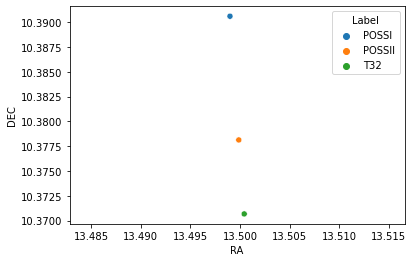

In [125]:
plt.figure()
sns.scatterplot(data =df , x = 'RA', y = 'DEC', hue = 'Label')
ax = plt.gca()

ax.axis('equal')